**🔹LOADING OF DATA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter
import numpy as np
from sklearn.preprocessing import LabelEncoder

##note all annotations for the graphs are in ## (e.g ##1 is graph 1)
#Load dataset
from google.colab import files
uploaded = files.upload()#prompt to upload files
df = pd.read_csv('London_Weather.csv') #Checks if uploaded data file name is "london_weather.csv"

Saving London_Weather.csv to London_Weather.csv


**🔹 DATA CLEANING & PREPROCESSING**

Handling of missing data

In [2]:
df['temp_max'].fillna(df['temp_max'].mean(), inplace=True)
df['wind'].fillna(df['wind'].mean(), inplace=True)
df.dropna(subset=['weather'], inplace=True)  # Only drop rows where 'weather' is missing

<ipython-input-2-1717f1ab641d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temp_max'].fillna(df['temp_max'].mean(), inplace=True)
<ipython-input-2-1717f1ab641d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Remove Duplicates

In [4]:
df.drop_duplicates(inplace=True)

Fix 'precipitation' column by filling missing values for heavy rain cases

In [6]:
#singling out heavy rain weather type
heavy_rain_condition = df["weather"].str.lower().str.contains("heavy rain", na=False)

#Calculating of mean
mean_precip_heavy = df.loc[heavy_rain_condition & (df["precipitation"] > 0), "precipitation"].mean()

Replacing missing values for heavy rain

In [8]:
#Replacing all zero values by mean value
if df.loc[heavy_rain_condition & (df["precipitation"] == 0), "precipitation"].count() > 0:
    df.loc[heavy_rain_condition & (df["precipitation"] == 0), "precipitation"] = mean_precip_heavy

Selection of numeric columns

In [9]:
#visualization and modeling
df_numeric = df.select_dtypes(include=['number'])

**🔹 ENCODING WEATHER COLUMN**

In [10]:
le = LabelEncoder()

# Convert weather conditions into numeric values
df['weather_encoded'] = le.fit_transform(df['weather'])

Defining features(X)and target variable (y)

In [11]:
X = df[['temp_max', 'temp_min', 'wind', 'precipitation']]  # Features
y = df['weather_encoded']  # Encoded weather labels

**🔹 EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATIONS**

Extracting temporal features from Date columns

In [13]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

#Extract day,month,and year into new columns
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year']=df['date'].dt.year

Display first few rows of the dataset

In [14]:
print(df.head(9))

        date  precipitation  temp_max  temp_min  wind     weather  \
0 2020-01-01       0.000000      12.8       5.0   4.7  Light Rain   
1 2020-01-02      10.900000      10.6       2.8   4.5  Heavy Rain   
2 2020-01-03       0.800000      11.7       7.2   2.3  Heavy Rain   
3 2020-01-04      20.300000      12.2       5.6   4.7  Heavy Rain   
4 2020-01-05       1.300000       8.9       2.8   6.1  Heavy Rain   
5 2020-01-06       2.500000       4.4       2.2   2.2  Heavy Rain   
6 2020-01-07       7.048826       7.2       2.8   2.3  Heavy Rain   
7 2020-01-08       0.000000      10.0       2.8   2.0         Sun   
8 2020-01-09       4.300000       9.4       5.0   3.4  Heavy Rain   

   weather_encoded  day  month  year  
0                1    1      1  2020  
1                0    2      1  2020  
2                0    3      1  2020  
3                0    4      1  2020  
4                0    5      1  2020  
5                0    6      1  2020  
6                0    7      1  2020

*Graph 1 Correlation Heatmap*

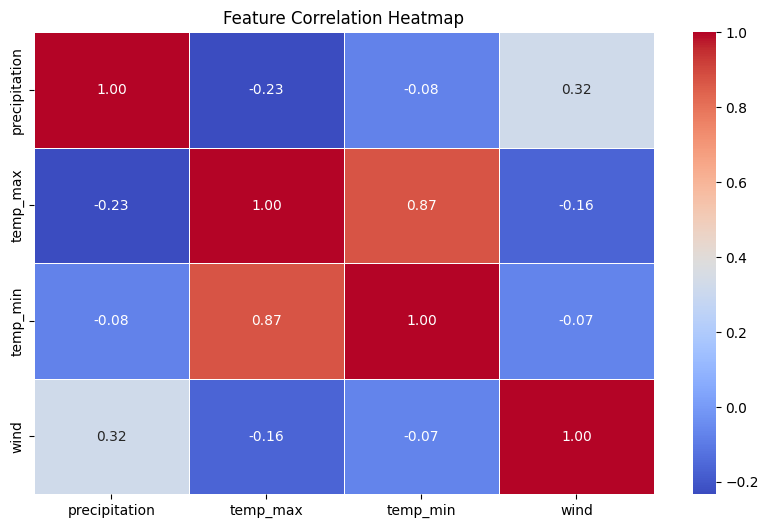

In [15]:
##1
#Identifies relationships between numerical features
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt. show()

*Graph 2 Bar Chart: Weather Condition Frequency*

<ipython-input-16-533c17cab8ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['weather'], order=df['weather'].value_counts().index, palette='coolwarm')


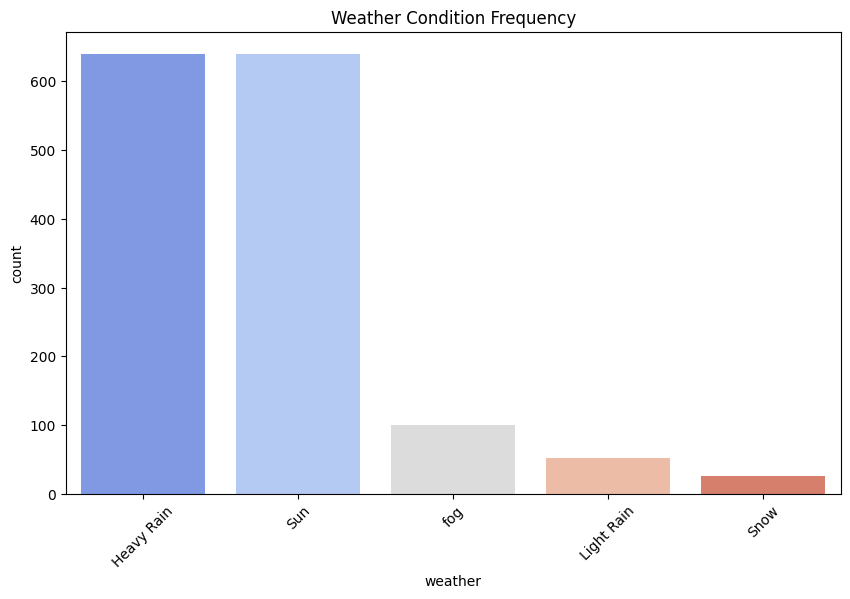

In [16]:
##2
plt.figure(figsize=(10, 6))
sns.countplot(x=df['weather'], order=df['weather'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Weather Condition Frequency")
plt.show()

*Graph 3 Scatter Plot: Wind vs. Precipitation (color-coded by weather type)*

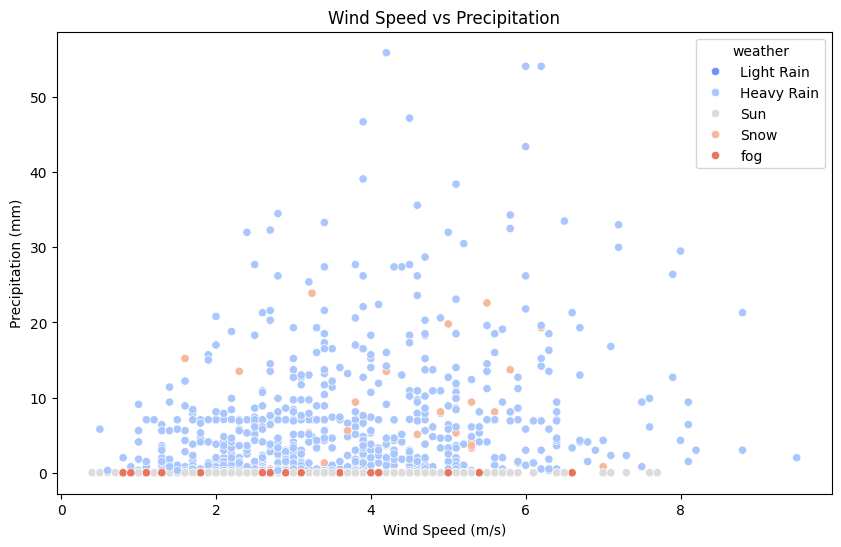

In [17]:
##3
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["wind"], y=df["precipitation"], hue=df["weather"], palette="coolwarm")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Precipitation (mm)")
plt.title("Wind Speed vs Precipitation")
plt. show()

*Graph 4 Time Series Plot: Max and Min Temperature Over Time*

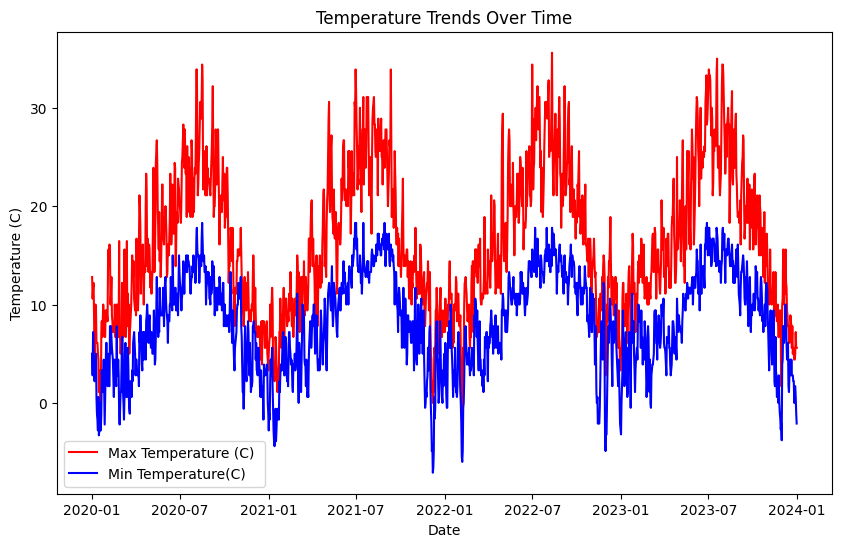

In [18]:
##4
plt.figure(figsize=(10, 6))
plt.plot(df["date"], df["temp_max"], label="Max Temperature (C) ", color="red")
plt.plot(df["date"], df["temp_min"], label="Min Temperature(C)", color="blue")
plt.xlabel ("Date")
plt.ylabel("Temperature (C)")
plt.title("Temperature Trends Over Time")
plt.legend()
plt.show()

*Graph 5 Histogram: Distribution of Max and Min temp*

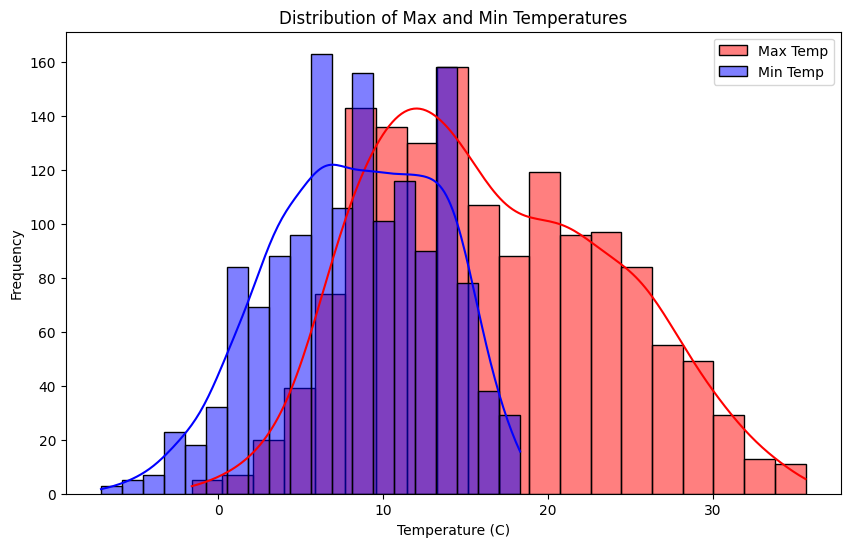

In [19]:
##5
plt.figure(figsize=(10, 6))
sns.histplot(df['temp_max' ], bins=20, kde=True, color='red', label="Max Temp")
sns.histplot(df['temp_min' ], bins=20, kde=True, color='blue', label="Min Temp")
plt.xlabel("Temperature (C)")
plt.ylabel("Frequency")
plt.title("Distribution of Max and Min Temperatures")
plt.legend()
plt.show()

*Graph 6*

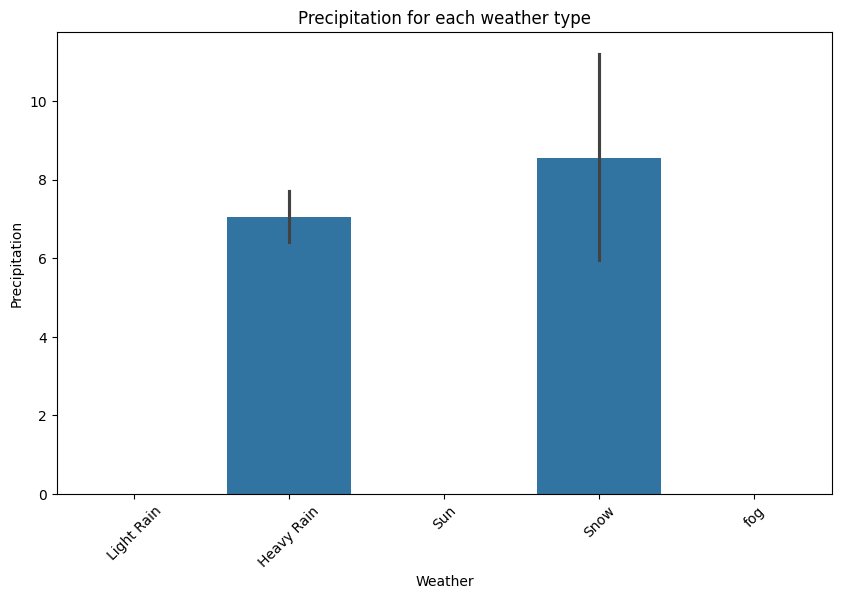

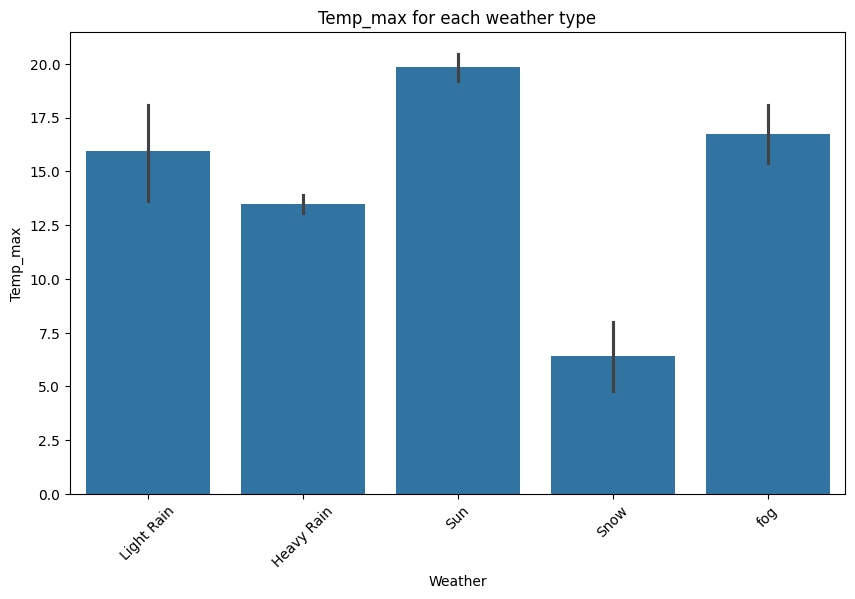

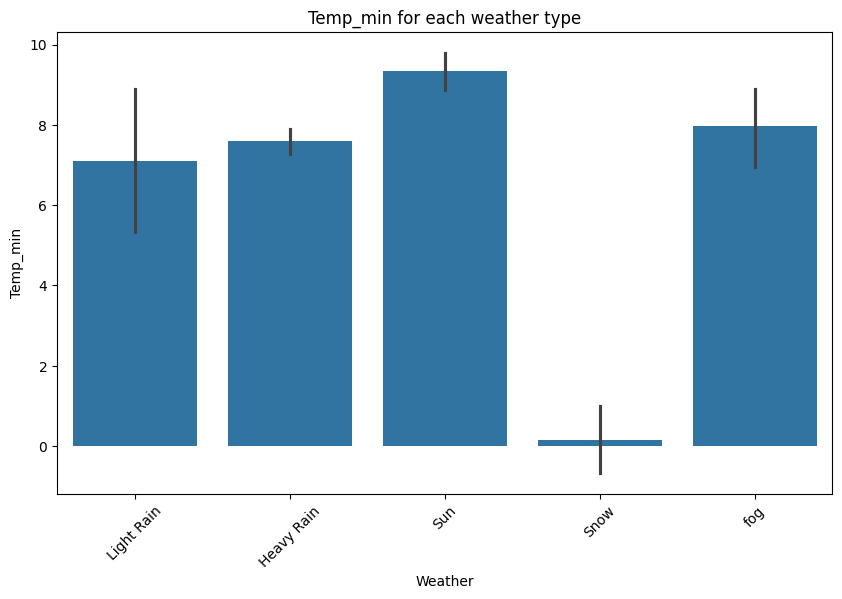

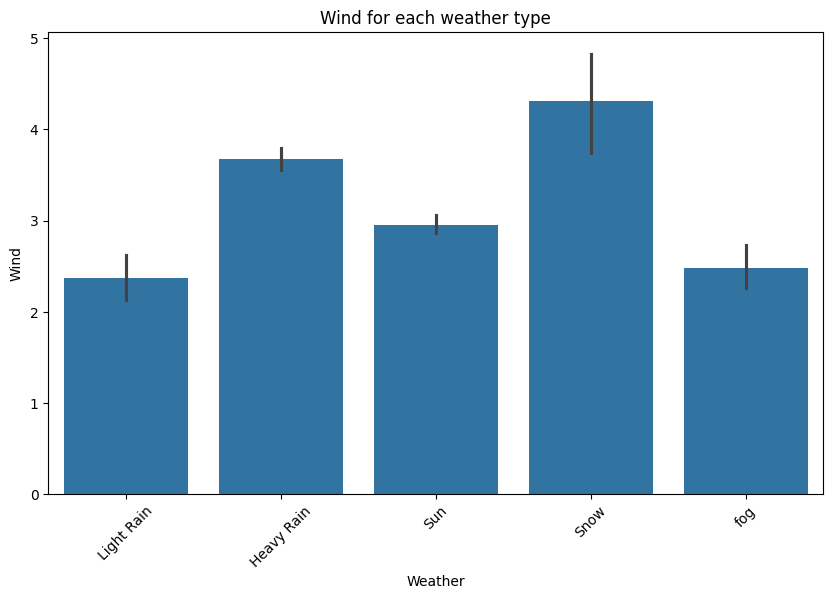

In [20]:
##6
y_variables = ['precipitation', 'temp_max', 'temp_min', 'wind']##array of all graphs to be plotted
for y_var in y_variables:##loops 4 times to print 4 barcharts
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="weather", y=y_var)
    plt.xticks(rotation=45)
    plt.xlabel("Weather")
    plt.ylabel(y_var.capitalize()) # Capitalize y-axis label
    plt.title(f'{y_var.capitalize()} for each weather type') # More informative title
    plt.show()

*Graph 7 Pair Plot: Relationships Between Weather Variables*

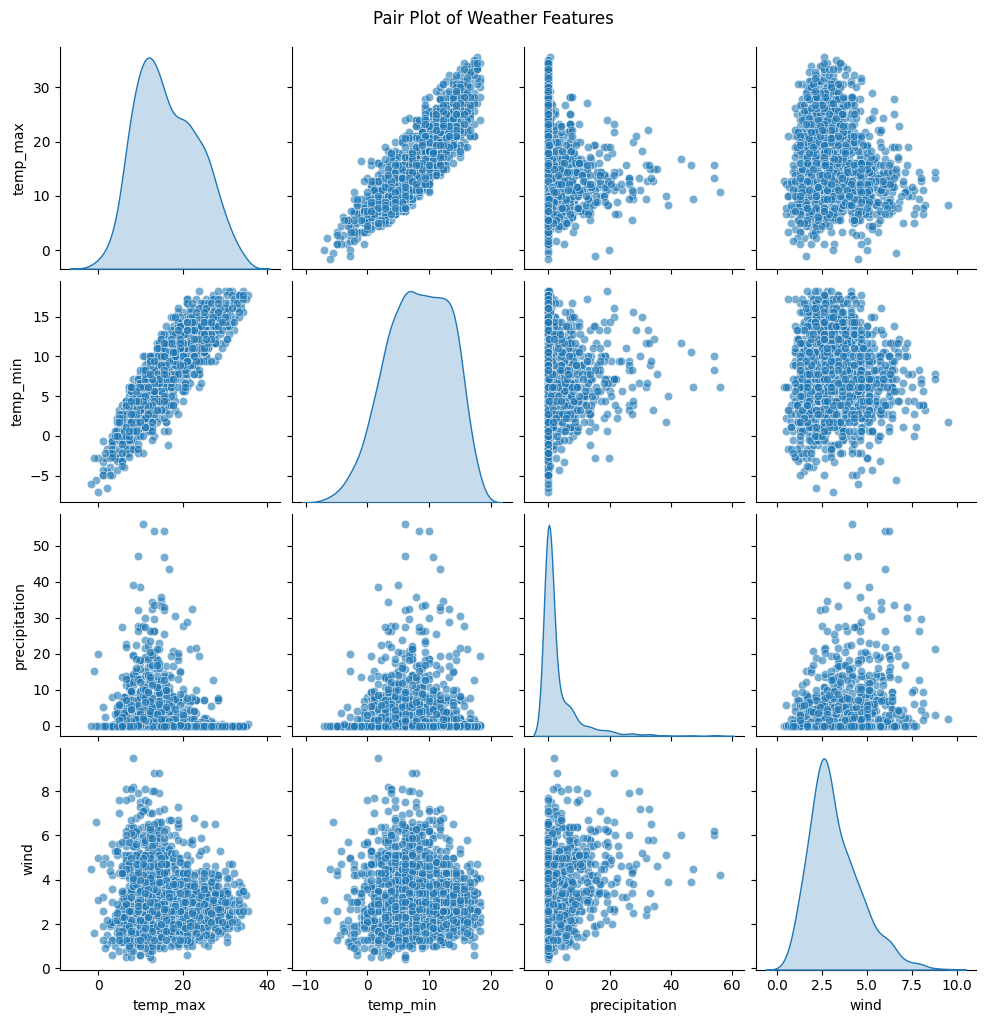

In [21]:
# Selecting relevant numerical columns
#7
numeric_features = ["temp_max", "temp_min", "precipitation", "wind"]
sns.pairplot(df[numeric_features], diag_kind="kde", markers="o", plot_kws={'alpha':0.6})
plt.suptitle("Pair Plot of Weather Features", y=1.02)
plt. show()

*Graph 8 Box Plot: Temperature, Wind, and Precipitation Distribution*

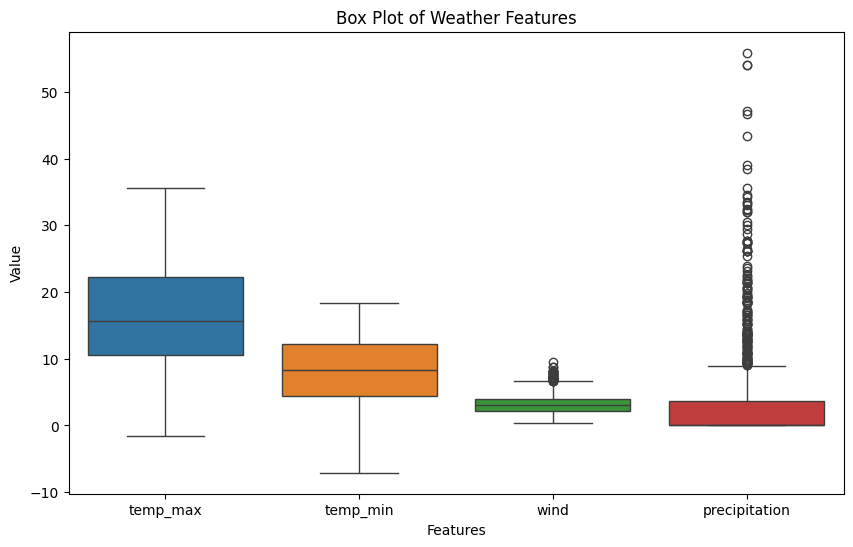

In [22]:
#Helps detect outliers in temperature, wind, or precipitation
#8
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["temp_max", "temp_min", "wind", "precipitation"] ])
plt.title("Box Plot of Weather Features")
plt.ylabel("Value")
plt.xlabel("Features")
plt. show()

*Graph 9, 10 , 11, 14  LOOP FOR SEPARATING ALL WEATHER TYPES BY MONTH, DAY AND YEAR*

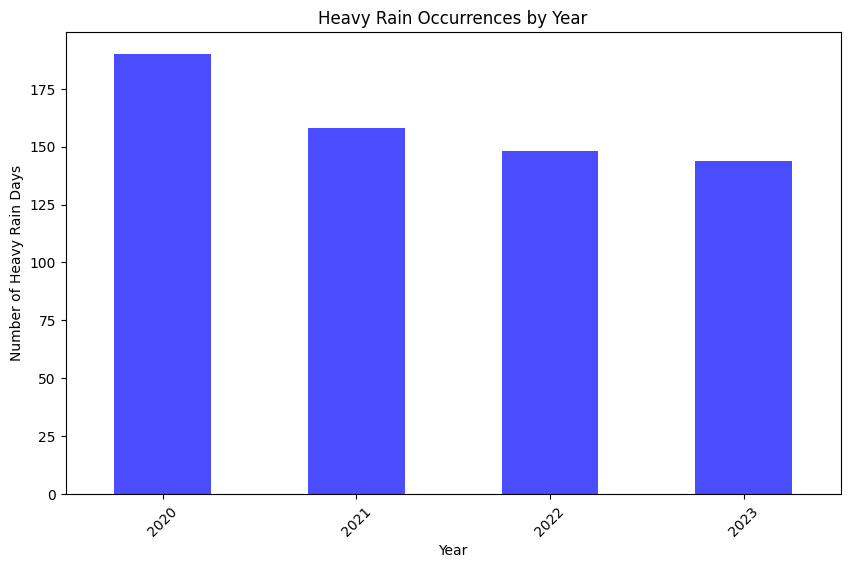

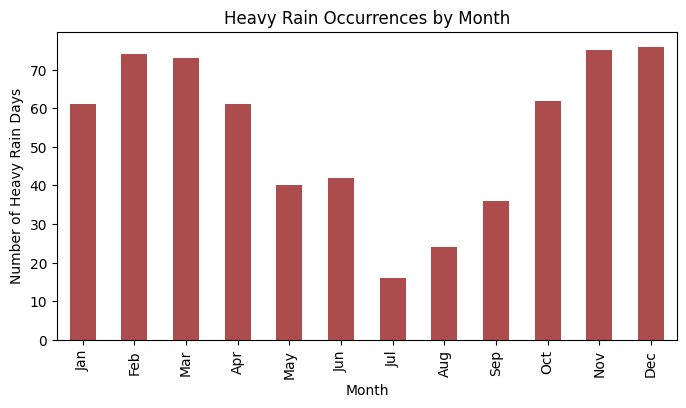

<Figure size 1000x600 with 0 Axes>

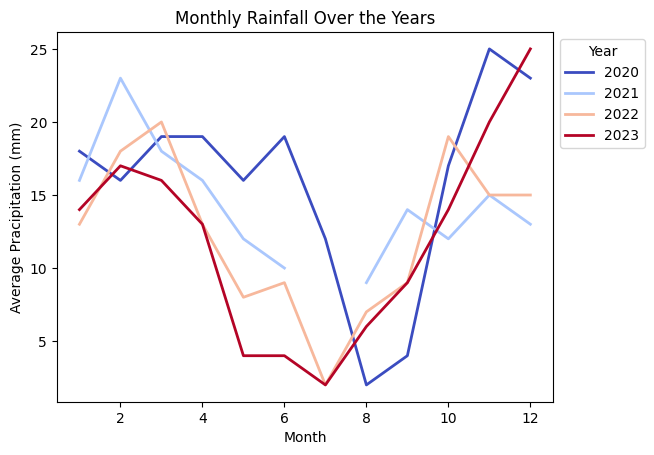

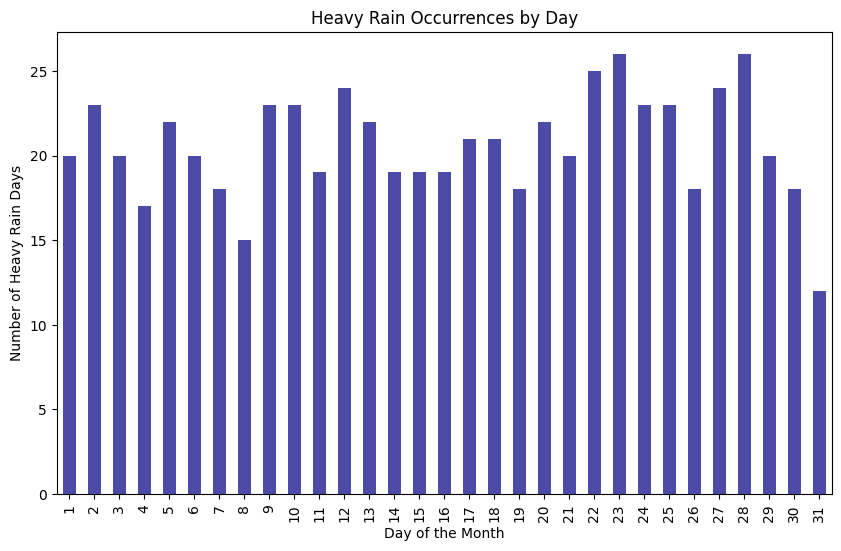

<Figure size 640x480 with 0 Axes>

In [23]:
weather_types = ["heavy rain", "light rain", "sun", "fog", "snow"]##initialization of array for weather types.

##GROUPING FOR YEAR
for weather in weather_types:
    subset1 = df[df['weather'].str.lower().str.contains(weather, na=False)]##this creates subset1 which captures all the weather types in array "weather_types"
    counts1 = subset1.groupby('year').size()  ##this counts the number of occurences of said weather events over the years

    if weather == "sun":
        color = 'gold'
        title = "Sunny Days by year"

    elif weather == "heavy rain":
        color = 'navy'
        title = "Heavy Rain Days by year"
        ##9
        plt.figure(figsize=(10, 6))
        counts1.plot(kind='bar', color='blue', alpha=0.7)
        plt.xlabel("Year")
        plt.ylabel("Number of Heavy Rain Days")
        plt.title("Heavy Rain Occurrences by Year")
        plt.xticks(rotation=45)
        plt.show()
    elif weather == "light rain":
        color = 'cyan'
    elif weather == "foggy":
        color = 'slategray'
        title = "foggy Days by year"
    elif weather == "snow":
        color = 'dodgerblue'
        title = "snow Days by year"
##GROUPING FOR MONTH
for weather in weather_types:

    subset2 = df[df['weather'].str.lower().str.contains(weather, na=False)]##similar to subset 1 capture all the weather types in array "weather_types"
    counts2 = subset2.groupby('month').size() ##counts the number of occurences of said weather events over the months


    if weather == "sun":
        color = 'gold'
        title = "Sunny days by month"

    elif weather == "heavy rain":
        color = 'navy'
        title = "Heavy Rain Days by month"

        ##10
        plt.figure(figsize=(8, 4))
        counts2.plot(kind='bar', color='darkred', alpha=0.7)
        plt.xlabel("Month")
        plt.ylabel("Number of Heavy Rain Days")
        plt.title("Heavy Rain Occurrences by Month")
        plt.xticks(range(0, 12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
        plt.show()

        ##14
        counts_yearly_monthly = subset2.groupby([df['date'].dt.year, df['date'].dt.month]).size()##groups the weather types by month and year
        counts_unstacked = counts_yearly_monthly.unstack(0)##separarates the year into a different column hence separating the month and year for getting our desired plot
        plt.figure(figsize=(10, 6))
        counts_unstacked.plot(kind="line", cmap="coolwarm", linewidth=2)
        plt.xlabel("Month")
        plt.ylabel("Average Pracipitation (mm)")
        plt.title("Monthly Rainfall Over the Years")
        plt.legend(title="Year", bbox_to_anchor=(1, 1))
        plt.show()
    elif weather == "light rain":
        color = 'cyan'
    elif weather == "foggy":
        color = 'slategray'
        title = "foggy Days by month"
    elif weather == "snow":
        color = 'dodgerblue'
        title = "snow Days by month"

     #GROUPING FOR DAYS
for weather in weather_types:
    subset3 = df[df['weather'].str.lower().str.contains(weather, na=False)]##again subset3 captures all weather types in array "weather_types"
    counts3 = subset3.groupby('day').size()##counts3 counts the number of occurences of weather events over the days of all the years combined

    if weather == "sun":
        color = 'gold'
        title = "Sunny Days by days"
    elif weather == "heavy rain":
        color = 'navy'
        title = "Heavy Rain Days by days"

        ##11
        plt.figure(figsize=(10, 6))
        counts3.plot(kind='bar', color=color, alpha=0.7)
        plt.xlabel("Day of the Month")
        plt.ylabel("Number of Heavy Rain Days")
        plt.title("Heavy Rain Occurrences by Day")
        plt.xticks(range(0, 31)) # Days 1 to 31
        plt. show()
    elif weather=="light rain":
        color='cyan'
        title="light rain days by days"
    elif weather=="foggy":
        color='slategray'
        title="foggy days by days"
    elif weather=="snow":
        color='dodgerblue'
        title="snowy days by days"

plt.tight_layout()
plt.show()

*Graph 12 Seasonal Trends in Temperature & Precipitation*

<ipython-input-24-f6ea53307288>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['season'], y=df['temp_max'], palette="coolwarm")


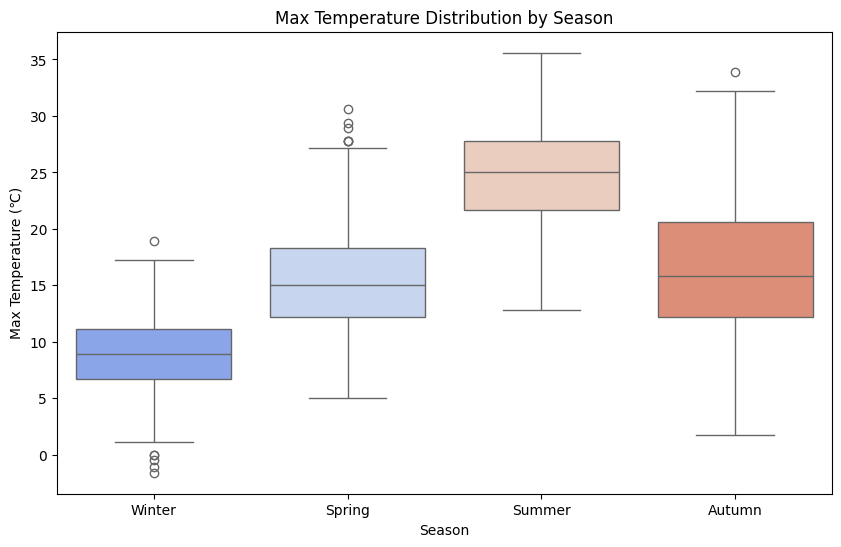

In [24]:
##12
#Identify how temperature and precipitation vary
# Define seasons
df['season' ] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Autumn')))
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['season'], y=df['temp_max'], palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Max Temperature (℃)")
plt.title("Max Temperature Distribution by Season")
plt. show()

*Graph 13 Seasonal precipitation trends*

<ipython-input-25-541ccc960e7b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['season' ], y=df[ 'precipitation' ], palette="Blues")


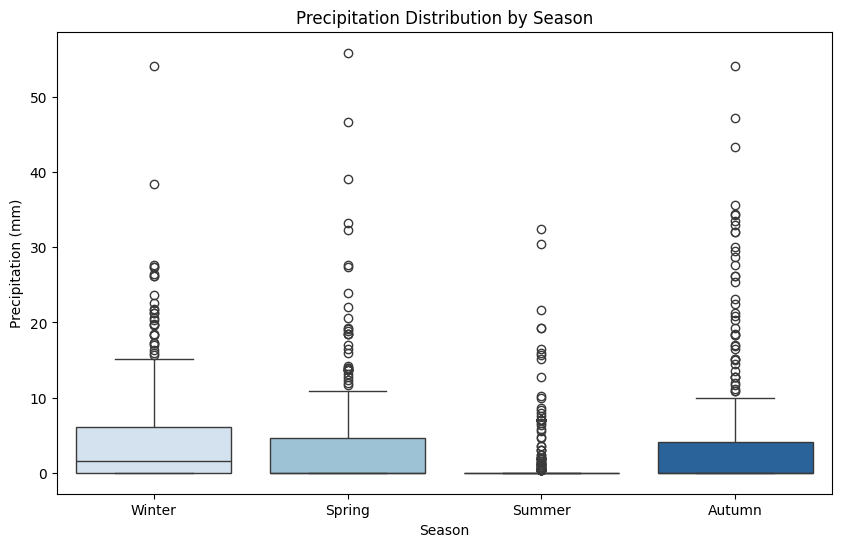

In [25]:
#13
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['season' ], y=df[ 'precipitation' ], palette="Blues")
plt.xlabel("Season")
plt.ylabel("Precipitation (mm)")
plt.title("Precipitation Distribution by Season")
plt. show()

*Graph 15 Wind Speed Distribution Over Time*

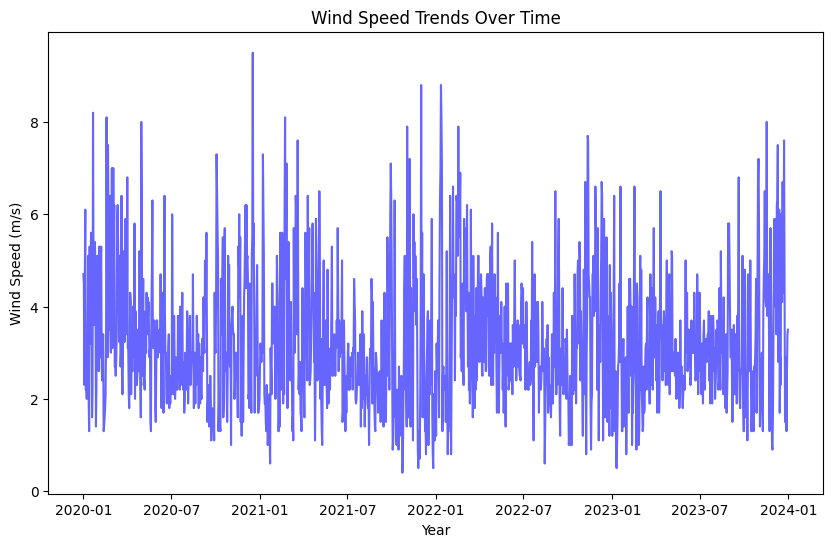

In [26]:
#15
plt.figure(figsize=(10, 6))
plt.plot(df["date"], df["wind"], color="blue", alpha=0.6)
plt.xlabel("Year")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed Trends Over Time")
plt.show()